<a href="https://colab.research.google.com/github/Airysm/GitTest/blob/master/n223a_evaluation_metrics_for_classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---

# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.
- **다음 조건에서 F beta score를 구하고 과제 제출폼에 제출하세요.**
    - TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정밀도의 2배 가중치를 부여합니다.

In [1]:
tp = 4442
tn = 6165
fp = 1515
fn = 1930
beta = 2

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f_beta_score = (1+ beta**2) * (precision*recall)/((beta**2*precision)+recall)

print("F beta score :", f_beta_score)

F beta score : 0.7063126093178566


### 2) 모델을 학습한 후 Confusion matrix를 그리고 해석하세요
- 임계값을 조정한 후 confusion matrix를 그려보세요
- **(객관식) 임계값을 증가시킬때 positive 범주에 대한 재현율의 변화 양상을 과제 제출폼에 제출하세요.**
    1. 증가
    2. 감소
    3. 변화가 없다


In [2]:
import pandas as pd
import numpy as np

In [14]:
target = 'vacc_h1n1_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [15]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=len(test), 
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((14050, 39), (28104, 39), (28104, 38))

In [16]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    df = df.drop('marital', axis = 1)    
    df = df.drop('census_region', axis = 1) 
    df = df.drop('n_adult_r', axis = 1)
    df = df.drop('household_children', axis = 1)

    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)

        
    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

In [17]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [8]:
pip install category_encoders

     |████████████████████████████████| 81kB 5.8MB/s 


In [18]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.8194563051522915


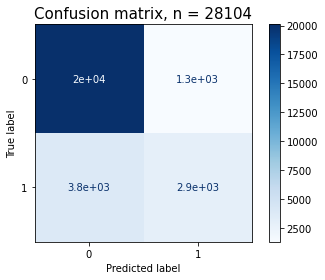

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

False    23900
True      4204
dtype: int64

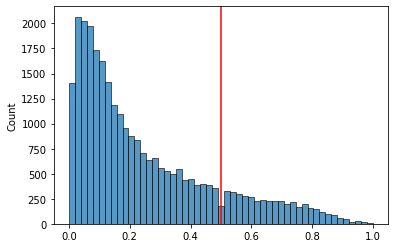

In [20]:
import seaborn as sns

threshold = 0.5
y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

### 3) 랜덤포레스트의 n_estimator를 1, 10, 100, 1000으로 바꾸어 가며 positive 범주의 predict_proba를 비교해 보세요
- 파라미터는 다음과 같이 설정합니다.
    - n_jobs=-1, random_state=10, max_depth=None, n_estimators = n
- **(객관식) 확률값들의 분포(종류)의 변화를 과제 제출폼에 제출하세요**
    1. 다양해진다
    2. 변화가없다


In [ ]:

for n in [1,10, 100, 1000] :

 pipe = make_pipeline(
       OrdinalEncoder(),
       SimpleImputer(strategy='mean'),  # 빈 값을 평균으로 채우기
       RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None,n_estimators = n)) # 랜덤포레스트 파라미터 지정
 
 pipe.fit(X_train, y_train)

 y_train_pred = pipe.predict(X_train)
 y_val_pred = pipe.predict(X_val)

 print('n_estimator =', n)
 print('훈련 정확도 : ', pipe.score(X_train, y_train))
 print('검증 정확도 : ', pipe.score(X_val, y_val))
 print('훈련 f1_score :', f1_score(y_train, y_train_pred))
 print('검증 f1_score :', f1_score(y_val, y_val_pred))

n_estimator = 1
훈련 정확도 :  0.9031316725978648
검증 정확도 :  0.7435240535155138
훈련 f1_score : 0.7957376557106409
검증 f1_score : 0.4611244019138756
n_estimator = 10
훈련 정확도 :  0.980711743772242
검증 정확도 :  0.8050455451181326
훈련 f1_score : 0.9583525434147842
검증 f1_score : 0.4937632818996581
n_estimator = 100
훈련 정확도 :  0.9981494661921708
검증 정확도 :  0.8176771989752348
훈련 f1_score : 0.99612287503728
검증 f1_score : 0.531284302963776
n_estimator = 1000
훈련 정확도 :  0.9981494661921708
검증 정확도 :  0.8203102761172787
훈련 f1_score : 0.99612287503728
검증 f1_score : 0.5419085631349783


### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.
- 더 좋은 결과가 나오는 모델을 사용해서 캐글에 제출하세요
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# n_estimator = 100

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs = -1, random_state = 2, oob_score= True, max_depth=10, n_estimators=100))
  
pipe.fit(X_train,y_train)
y_pred_proba = pipe.predict_proba(X_val)[:,1]
y_pred_proba100 = np.array(y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba100)

roc100 = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc100

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.908905
1,0.000000,0.000149,0.908905
2,0.000000,0.005508,0.825924
3,0.000047,0.005508,0.825435
4,0.000047,0.005656,0.825311
...,...,...,...
7363,0.993080,0.999702,0.017265
7364,0.993080,0.999851,0.017125
7365,0.993594,0.999851,0.016865
7366,0.993594,1.000000,0.016826


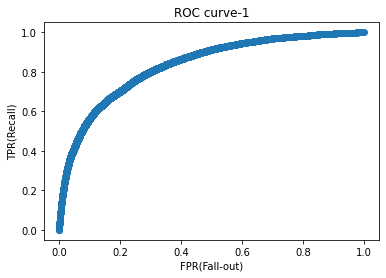

In [ ]:
plt.scatter(fpr, tpr)
plt.title('ROC curve-1')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [ ]:
auc_score100 = roc_auc_score(y_val, y_pred_proba100)
auc_score100

0.8353695343201406

In [ ]:
# n_estimator = 1000

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs = -1, random_state = 2, oob_score= True, max_depth=10, n_estimators=1000))
  
pipe.fit(X_train,y_train)
y_pred_proba = pipe.predict_proba(X_val)[:,1]
y_pred_proba1000 = np.array(y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba1000)

roc1000 = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc1000

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.863533
1,0.000000,0.000149,0.863533
2,0.000000,0.006550,0.808420
3,0.000047,0.006550,0.807604
4,0.000047,0.007443,0.805006
...,...,...,...
7431,0.989853,0.999702,0.022521
7432,0.989853,0.999851,0.022510
7433,0.999906,0.999851,0.013087
7434,0.999906,1.000000,0.013085


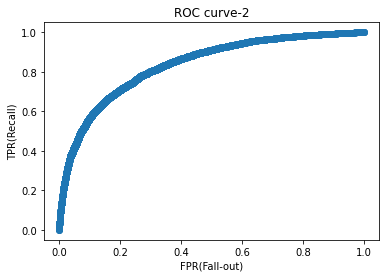

In [ ]:
plt.scatter(fpr, tpr)
plt.title('ROC curve-2')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [ ]:
auc_score1000 = roc_auc_score(y_val, y_pred_proba1000)
auc_score1000

0.8359306003457284

In [ ]:
test_pred = pipe.predict(X_test)
submission = pd.DataFrame({'vacc_h1n1_f':test_pred})
submission = pd.DataFrame({'id':submission.index,'vacc_h1n1_f':test_pred})
submission.to_csv('submission.csv',index=False)
submission 

,id,vacc_h1n1_f
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
28099,28099,0
28100,28100,0
28101,28101,0
28102,28102,0


## 🔥 도전과제

### 5) 각 평가지표에 대해 결과를 최대한 분석하고 무엇이 부족한지, 어떤 방향으로 성능을 높여야 하는지 논하세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 